In [1]:
import torch
import numpy as np
import torch.nn.functional as F
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display, HTML
%matplotlib inline

In [2]:
def vis(t: torch.Tensor, label=''):
    data = t.detach().numpy()
    data = data.round(3)
    df = pd.DataFrame(columns=data) if t.ndim == 1 else pd.DataFrame(data)
    df.columns.name = label+':'
    # df = df.style.set_table_styles([{'selector': 'th', 'props': [('font-weight', 'normal')]}])
    display(df)

vis(torch.rand(7))

:,0.538,0.755,0.596,0.534,0.728,0.161,0.386


In [3]:
words = open('names.txt', 'r').read().splitlines()
print(f'{len(words)} words')
print(f'min word length: {min(len(w) for w in words)}')
print(f'max word length: {max(len(w) for w in words)}')
print(words[:10])

32033 words
min word length: 2
max word length: 15
['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia', 'harper', 'evelyn']


In [4]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

print(stoi)
print(itos)

{'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'g': 7, 'h': 8, 'i': 9, 'j': 10, 'k': 11, 'l': 12, 'm': 13, 'n': 14, 'o': 15, 'p': 16, 'q': 17, 'r': 18, 's': 19, 't': 20, 'u': 21, 'v': 22, 'w': 23, 'x': 24, 'y': 25, 'z': 26, '.': 0}
{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [5]:
# GOAL: maximize likelihood of the data w.r.t. model parameters (statistical modeling)
# equivalent to maximizing the log likelihood (because log is monotonic)
# equivalent to minimizing the negative log likelihood
# equivalent to minimizing the average negative log likelihood

# log(a*b*c) = log(a) + log(b) + log(c)

In [6]:
# create the training set of bigrams (x,y)
xs, ys = [], []

for w in words[:1]:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    print(ch1, ch2)
    xs.append(ix1)
    ys.append(ix2)
    
xs = torch.tensor(xs)
ys = torch.tensor(ys)

vis(xs, 'xs')
vis(ys, 'ys')

. e
e m
m m
m a
a .


xs:,0,5,13,13,1


ys:,5,13,13,1,0


torch.Size([5, 27])


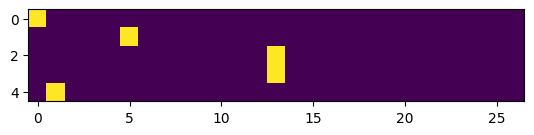

In [7]:
xenc = F.one_hot(xs, num_classes=27).float()
# vis(xenc)
print(xenc.shape)
plt.imshow(xenc)

In [8]:
W1 = torch.randn((27, 27*2))
vis(W1[:3],'W')
vis(xenc @ W1, 'xenc @ W')

W:,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
0,0.760,-0.948,0.145,-1.632,0.193,-1.564,-0.374,-0.747,-0.295,-0.471,...,0.370,0.317,-1.779,0.102,0.031,0.040,-1.418,-1.739,-0.049,-0.557
1,0.085,0.656,-0.167,-1.638,-0.245,0.209,-0.419,2.033,-1.725,1.629,...,-0.453,2.315,-0.226,-1.817,-0.971,-1.205,0.554,0.188,-0.051,-0.352
2,1.148,0.028,-0.986,-0.393,-3.087,-1.177,-0.052,0.310,-0.765,-0.238,...,1.080,-0.549,0.135,0.388,-0.303,-0.960,0.664,2.119,0.779,-2.131


xenc @ W:,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
0,0.760,-0.948,0.145,-1.632,0.193,-1.564,-0.374,-0.747,-0.295,-0.471,...,0.370,0.317,-1.779,0.102,0.031,0.040,-1.418,-1.739,-0.049,-0.557
1,0.355,0.015,-0.813,1.486,-0.892,-0.051,0.132,-0.399,1.036,0.839,...,-0.265,-0.408,-0.235,0.283,0.848,-1.378,0.123,0.789,0.855,-2.261
2,1.436,-0.411,-0.598,-1.117,-0.042,0.147,-0.334,0.253,-2.125,1.706,...,-1.389,-1.368,0.494,0.079,-0.424,0.508,0.703,0.760,-0.716,-0.342
3,1.436,-0.411,-0.598,-1.117,-0.042,0.147,-0.334,0.253,-2.125,1.706,...,-1.389,-1.368,0.494,0.079,-0.424,0.508,0.703,0.760,-0.716,-0.342
4,0.085,0.656,-0.167,-1.638,-0.245,0.209,-0.419,2.033,-1.725,1.629,...,-0.453,2.315,-0.226,-1.817,-0.971,-1.205,0.554,0.188,-0.051,-0.352


In [9]:
logits = xenc @ W1 # log-counts
counts = logits.exp() # equivalent N
probs = counts / counts.sum(1, keepdims=True)
vis(probs)

:,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
0,0.041,0.007,0.022,0.004,0.023,0.004,0.013,0.009,0.014,0.012,...,0.028,0.026,0.003,0.021,0.020,0.020,0.005,0.003,0.018,0.011
1,0.016,0.011,0.005,0.049,0.005,0.010,0.013,0.007,0.031,0.025,...,0.008,0.007,0.009,0.015,0.026,0.003,0.012,0.024,0.026,0.001
2,0.043,0.007,0.006,0.003,0.010,0.012,0.007,0.013,0.001,0.057,...,0.003,0.003,0.017,0.011,0.007,0.017,0.021,0.022,0.005,0.007
3,0.043,0.007,0.006,0.003,0.010,0.012,0.007,0.013,0.001,0.057,...,0.003,0.003,0.017,0.011,0.007,0.017,0.021,0.022,0.005,0.007
4,0.011,0.019,0.008,0.002,0.008,0.012,0.007,0.076,0.002,0.051,...,0.006,0.101,0.008,0.002,0.004,0.003,0.017,0.012,0.010,0.007


In [10]:
# SUMMARY ------------------------------>>>>

In [11]:
# randomly initialize 27 neurons' weights. each neuron receives 27 inputs
g = torch.manual_seed(2147483647)
W1 = torch.randn((27, 27))
vis(W1[:3])

:,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,1.567,-0.237,-0.027,-1.101,0.286,-0.030,-1.547,0.605,0.079,0.905,...,-1.626,0.677,-0.840,0.985,-0.148,-1.480,0.448,-0.071,2.497,2.445
1,-0.670,-1.220,0.303,-1.073,0.728,0.051,1.309,-0.802,-0.850,-1.807,...,-1.326,1.122,0.596,0.458,0.054,-1.740,0.116,0.803,0.541,-1.165
2,0.148,-1.001,0.380,0.473,-0.910,-0.783,0.135,-0.212,-1.041,-1.537,...,1.516,-1.045,-0.664,-0.724,1.751,0.175,0.993,-0.628,0.077,-1.164


In [12]:
xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
logits = xenc @ W1 # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
# btw: the last 2 lines here are together called a 'softmax'
vis(probs, 'probs')

probs:,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,0.061,0.010,0.012,0.004,0.017,0.012,0.003,0.023,0.014,0.031,...,0.002,0.025,0.005,0.034,0.011,0.003,0.020,0.012,0.154,0.146
1,0.029,0.080,0.025,0.052,0.199,0.029,0.009,0.033,0.010,0.030,...,0.005,0.092,0.021,0.049,0.030,0.050,0.003,0.012,0.002,0.047
2,0.031,0.074,0.048,0.033,0.067,0.020,0.026,0.025,0.123,0.016,...,0.012,0.065,0.006,0.021,0.008,0.013,0.020,0.120,0.047,0.013
3,0.031,0.074,0.048,0.033,0.067,0.020,0.026,0.025,0.123,0.016,...,0.012,0.065,0.006,0.021,0.008,0.013,0.020,0.120,0.047,0.013
4,0.015,0.009,0.040,0.010,0.061,0.031,0.108,0.013,0.013,0.005,...,0.008,0.090,0.053,0.046,0.031,0.005,0.033,0.065,0.050,0.009


In [13]:
nlls = torch.zeros(5)
for i in range(5):
  # i-th bigram:
  x = xs[i].item() # input character index
  y = ys[i].item() # label character index
  print('--------')
  print(f'bigram example {i+1}: {itos[x]}{itos[y]} (indexes {x},{y})')
  print('input to the neural net:', x)
  print('output probabilities from the neural net:', probs[i])
  print('label (actual next character):', y)
  p = probs[i, y]
  print('probability assigned by the net to the the correct character:', p.item())
  logp = torch.log(p)
  print('log likelihood:', logp.item())
  nll = -logp
  print('negative log likelihood:', nll.item())
  nlls[i] = nll

print('=========')
print('average negative log likelihood, i.e. loss =', nlls.mean().item())

--------
bigram example 1: .e (indexes 0,5)
input to the neural net: 0
output probabilities from the neural net: tensor([0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
        0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
        0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459])
label (actual next character): 5
probability assigned by the net to the the correct character: 0.012286253273487091
log likelihood: -4.3992743492126465
negative log likelihood: 4.3992743492126465
--------
bigram example 2: em (indexes 5,13)
input to the neural net: 5
output probabilities from the neural net: tensor([0.0290, 0.0796, 0.0248, 0.0521, 0.1989, 0.0289, 0.0094, 0.0335, 0.0097,
        0.0301, 0.0702, 0.0228, 0.0115, 0.0181, 0.0108, 0.0315, 0.0291, 0.0045,
        0.0916, 0.0215, 0.0486, 0.0300, 0.0501, 0.0027, 0.0118, 0.0022, 0.0472])
label (actual next character): 13
probability assigned by the net to the the correct character:

In [14]:
# --------- !!! OPTIMIZATION !!! yay --------------

In [15]:
# create the dataset
xs, ys = [], []
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    xs.append(ix1)
    ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('number of examples: ', num)

number of examples:  228146


In [35]:
# initialize the 'network'
torch.manual_seed(2147483647)
W1 = torch.zeros((27, 27), requires_grad=True)
lr = 10.0
l2 = 0.001
epochs = 1000

def model(xs):
  xenc = F.one_hot(xs, num_classes=27).float()
  logits = xenc @ W1 # predict log-counts
  # counts = logits.exp() # counts, equivalent to N
  # probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
  probs = logits.softmax(1)
  return probs

def loss_fn(p, l2):
  return -p[torch.arange(num), ys].log().mean() + l2 *(W1**2).mean()

# gradient descent
for k in range(1 + epochs):
  
  # forward pass
  p = model(xs)
  # vis(p)
  loss = loss_fn(p, l2)

  # debug
  if k % 25 == 0:
    print(f'{k:4d} {loss.item()}')
  
  # backward pass
  W1.grad = None
  loss.backward()
  
  # update
  W1.data += -lr * W1.grad

   0 3.29583740234375
  25 2.723572254180908
  50 2.610217332839966
  75 2.5641229152679443
 100 2.538996696472168
 125 2.5231285095214844
 150 2.512188196182251
 175 2.5041980743408203
 200 2.4981179237365723
 225 2.4933440685272217
 250 2.4895012378692627
 275 2.4863457679748535
 300 2.483710289001465
 325 2.481477975845337
 350 2.479564905166626
 375 2.4779090881347656
 400 2.4764623641967773
 425 2.475189447402954
 450 2.4740612506866455
 475 2.473055839538574
 500 2.472154140472412
 525 2.4713425636291504
 550 2.4706077575683594
 575 2.469940423965454
 600 2.469331979751587
 625 2.4687750339508057
 650 2.4682631492614746
 675 2.467792272567749
 700 2.4673573970794678
 725 2.466954231262207
 750 2.4665801525115967
 775 2.4662320613861084
 800 2.465907335281372
 825 2.4656035900115967
 850 2.4653193950653076
 875 2.465052604675293
 900 2.4648020267486572
 925 2.464566230773926
 950 2.464343786239624
 975 2.4641337394714355
1000 2.463934898376465


In [33]:
x = torch.tensor(np.arange(27))
xenc = F.one_hot(x, num_classes=27).float()
counts = (xenc @ W1).exp()
probs = counts / counts.sum(1, keepdims=True)
vis(probs)

:,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,0.000,0.989,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.001,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,0.994,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2,0.017,0.024,0.016,0.015,0.016,0.061,0.015,0.015,0.016,0.020,...,0.015,0.543,0.015,0.015,0.016,0.015,0.015,0.015,0.016,0.015
3,0.022,0.332,0.020,0.021,0.020,0.055,0.020,0.020,0.085,0.029,...,0.020,0.022,0.020,0.021,0.021,0.020,0.020,0.020,0.023,0.020
4,0.007,0.669,0.005,0.005,0.005,0.203,0.005,0.005,0.005,0.009,...,0.005,0.007,0.005,0.005,0.005,0.005,0.005,0.005,0.006,0.005
5,0.988,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.001,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
6,0.040,0.055,0.035,0.035,0.035,0.043,0.037,0.035,0.035,0.046,...,0.035,0.042,0.035,0.036,0.035,0.035,0.035,0.035,0.036,0.035
7,0.038,0.060,0.032,0.032,0.033,0.060,0.032,0.033,0.065,0.044,...,0.032,0.044,0.033,0.033,0.036,0.032,0.033,0.032,0.033,0.032
8,0.972,0.010,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,...,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001
9,0.911,0.051,0.001,0.001,0.001,0.003,0.001,0.001,0.001,0.001,...,0.001,0.002,0.002,0.001,0.001,0.001,0.001,0.001,0.001,0.001


In [34]:
# finally, sample from the 'neural net' model
torch.manual_seed(2147483647)
# torch.manual_seed(2)

for i in range(5):
  out = []
  ix = 0
  while True:
    p = model(torch.tensor([ix]))
    # ix = p.argmax().item()
    ix = torch.multinomial(p, num_samples=1, replacement=True).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

a.
a.
a.
a.
a.
